# **Heart Disease Prediction**

# **Data and Library Importing**

In [ ]:
# Capture library versions
!pip freeze > requirements.txt

# Import necessary libraries for data manipulation, visualization, and modeling.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from io import StringIO
import requests

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc



# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Original Google Drive link for dataset
orig_url = "https://drive.google.com/file/d/1amyz8XcpAiKRppXT-Cr2MDNY3kD8ws8N/view?usp=drive_link"

# Extract the file ID from the URL
file_id = orig_url.split('/')[-2]

# Construct the download URL
dwn_url = 'https://drive.google.com/uc?export=download&id=' + file_id

# Download the file
response = requests.get(dwn_url).text

# Use StringIO to load the CSV content into pandas
csv_raw = StringIO(response)

# Read the CSV into a DataFrame
df = pd.read_csv(csv_raw)

In [ ]:
#First few rows of the dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#Summary statistics for numerical columns
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# **Exploratory Data Analysis(EDA)**

In [ ]:
#Checking for NULL values
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


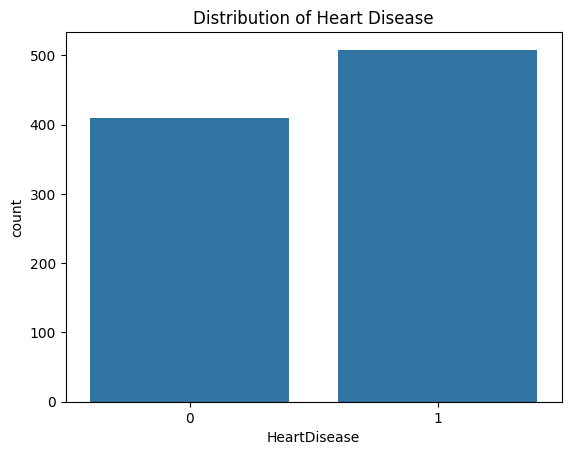

In [ ]:
# Visualize the distribution of the target variable (HeartDisease).
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

In [ ]:
#Histogram of chest pain

fig = px.histogram(
    df,
    x="ChestPainType",
    color="Sex",
    hover_data=df.columns,
    width=800,
    height=600,
    title="Types of Chest Pain in Men and Women",
    # Add barmode='group' to display bars side-by-side for comparison
    barmode='group',
    # Use category_orders for consistent order on x-axis
    category_orders={"ChestPainType": sorted(df['ChestPainType'].unique())},
    # Customize color for better distinction
    color_discrete_map={"Male": "blue", "Female": "red"},
    # Add labels to axes for clarity
    labels={"ChestPainType": "Chest Pain Type", "Sex": "Gender"}
)

fig.show()

<Figure size 1300x800 with 0 Axes>

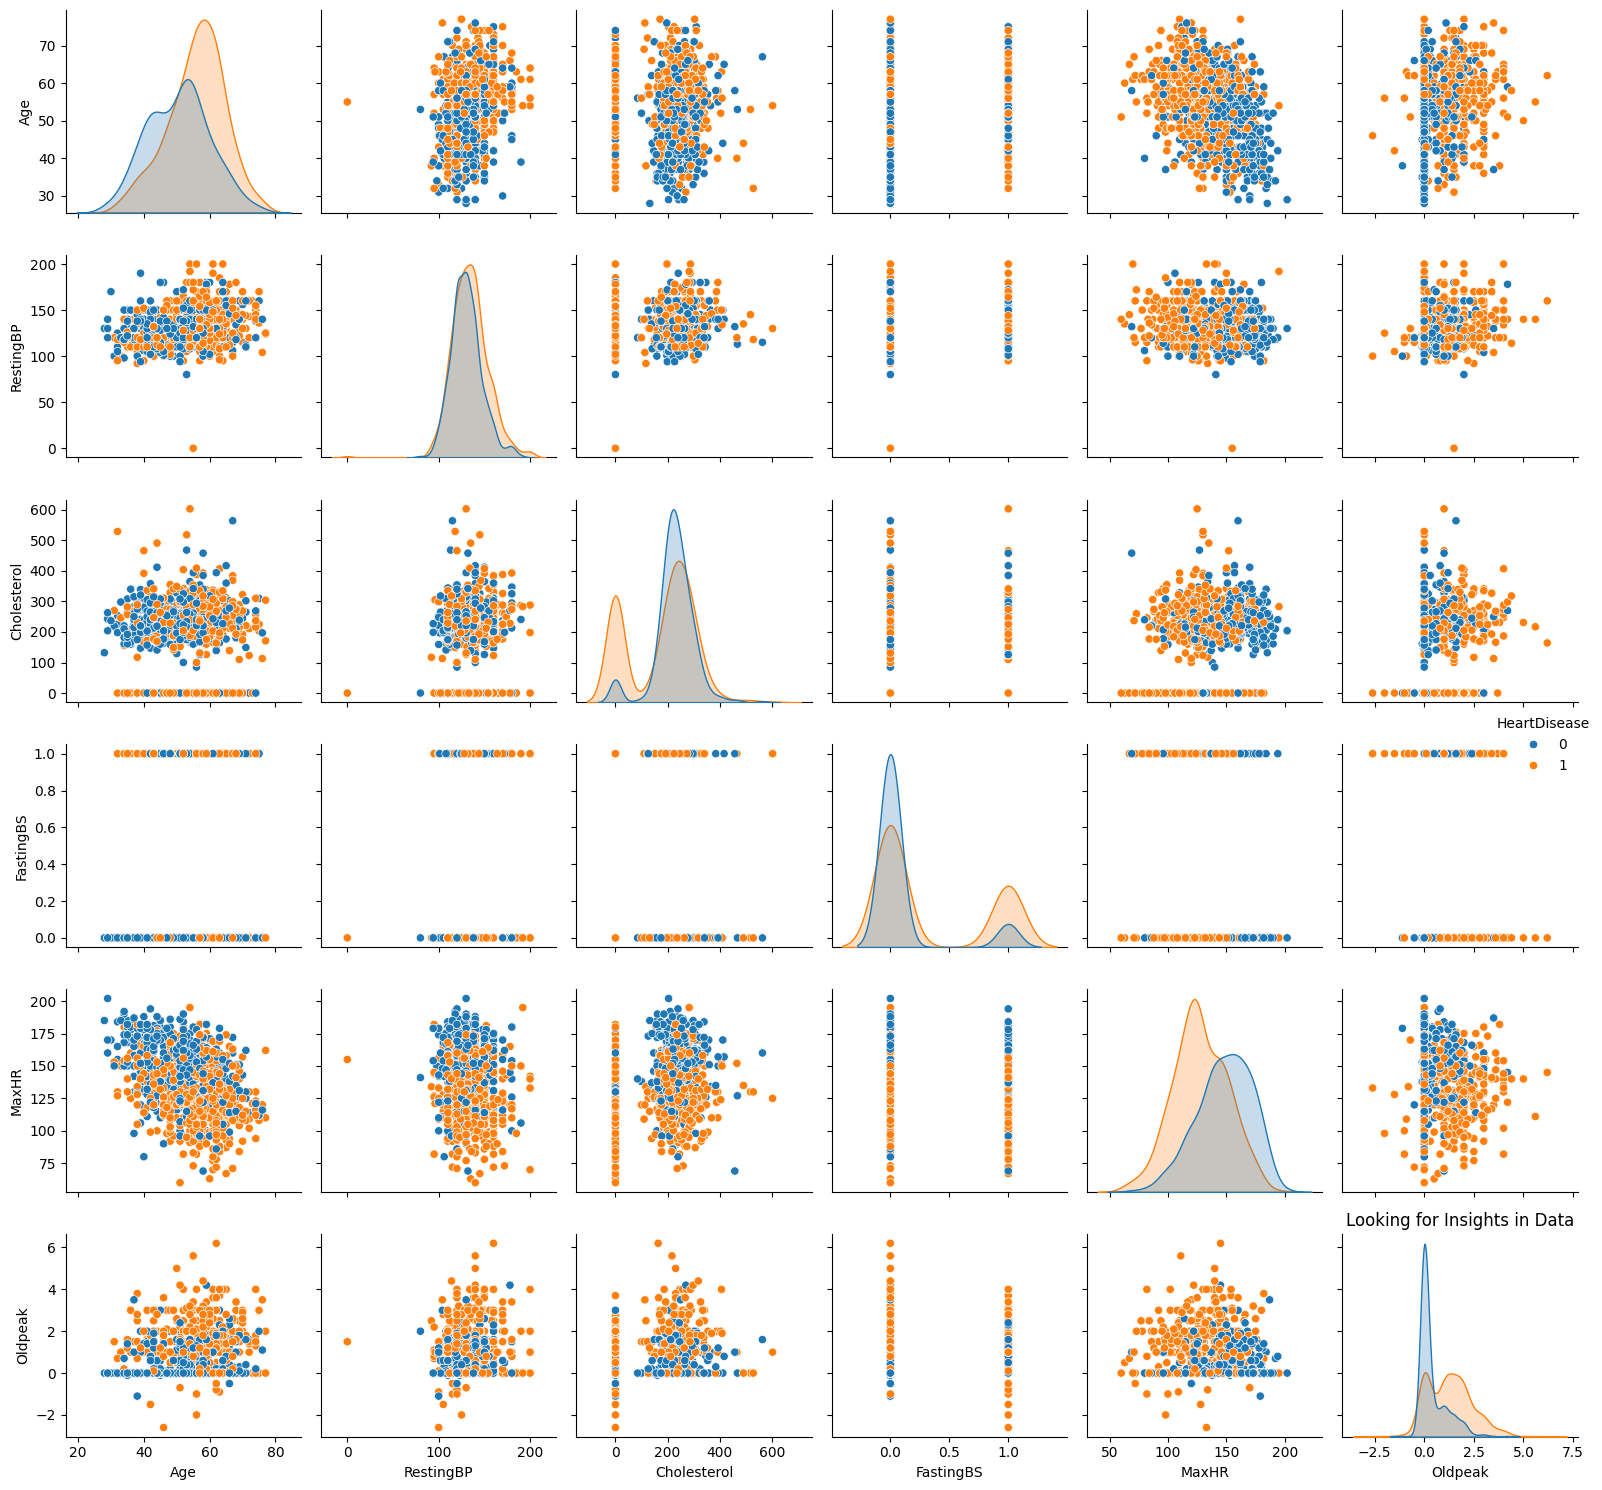

In [ ]:
# Pairplot for all data
plt.figure(figsize=(13,8))
sns.pairplot(df, hue="HeartDisease")

plt.title("Looking for Insights in Data")
plt.tight_layout()
plt.show()

In [ ]:
#Categorical Feature Relationships using Crosstabs and Chi-Squared Tests
for feature in ['FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    crosstab = pd.crosstab(df[feature], df['HeartDisease'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Chi-squared test for {feature} and HeartDisease:")
    print(f"Chi2 statistic: {chi2}")
    print(f"P-value: {p}")
    print("-" * 20)

Chi-squared test for FastingBS and HeartDisease:
Chi2 statistic: 64.3206790933594
P-value: 1.0573018731809955e-15
--------------------
Chi-squared test for RestingECG and HeartDisease:
Chi2 statistic: 10.931469339140978
P-value: 0.0042292328167544925
--------------------
Chi-squared test for ExerciseAngina and HeartDisease:
Chi2 statistic: 222.25938271530583
P-value: 2.907808387659878e-50
--------------------
Chi-squared test for ST_Slope and HeartDisease:
Chi2 statistic: 355.91844319207905
P-value: 5.167637689470128e-78
--------------------


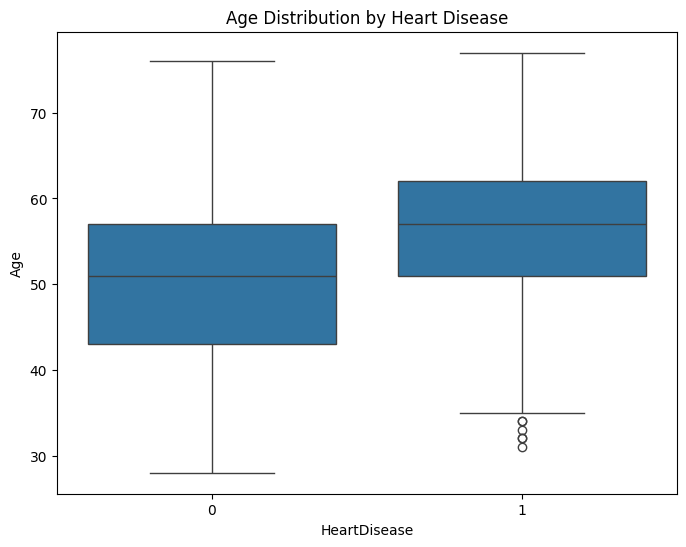

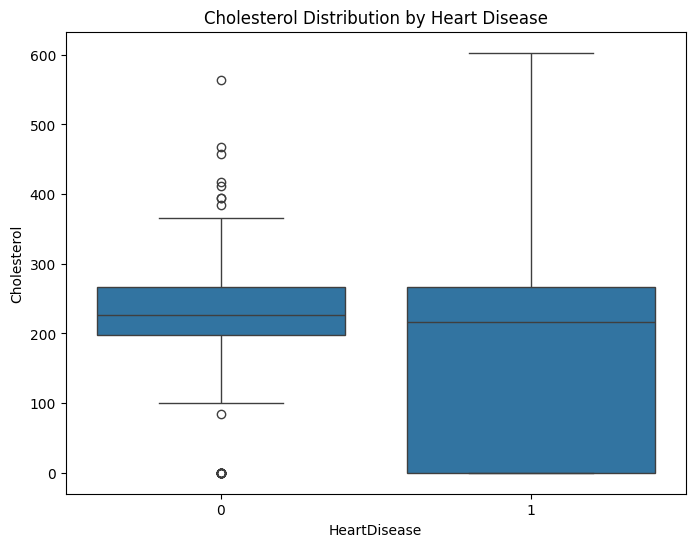

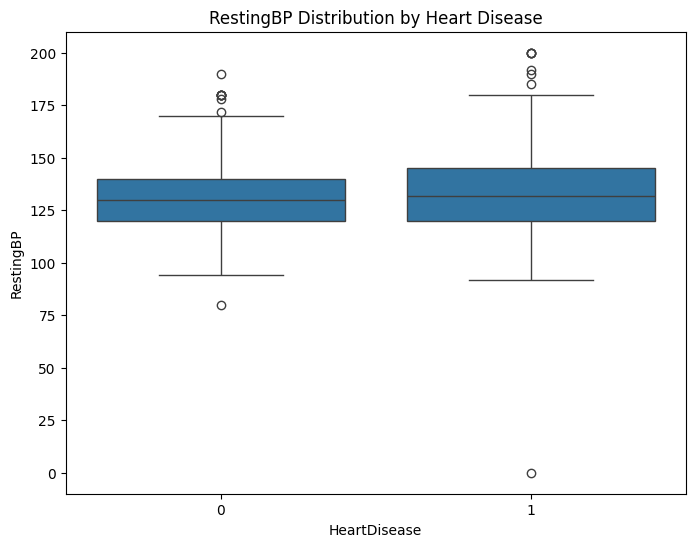

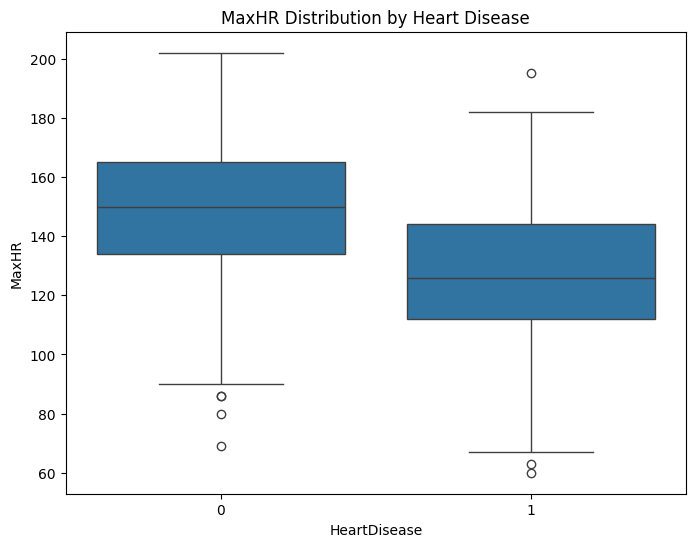

In [ ]:
#Outlier Detection with Box Plots
for feature in ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']:
      plt.figure(figsize=(8, 6))
      sns.boxplot(x='HeartDisease', y=feature, data=df)
      plt.title(f'{feature} Distribution by Heart Disease')
      plt.show()

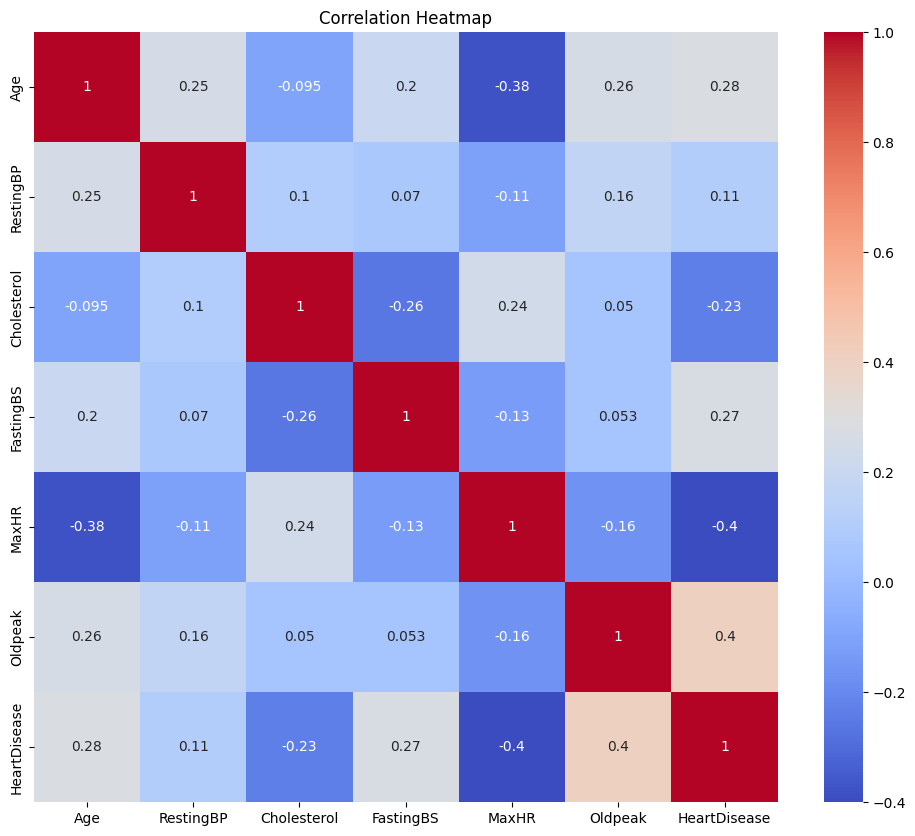

In [ ]:
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
cor = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Data Preprocessing**

**Encoding the Data**

In [ ]:
#Initialize LabelEncoder for Tree Base Algorithm
le = LabelEncoder()

#List of categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

#Apply Label Encoding
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nData after encoding categorical variables:")
print(df.head())


Data after encoding categorical variables:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  


In [ ]:
#List of categorical columns to one-hot encode for Non-Tree Based Algorithms
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

#Perform one-hot encoding using pandas get_dummies
encoded_df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#Display the first few rows of the encoded DataFrame
encoded_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_1,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_1,RestingECG_2,ExerciseAngina_1,ST_Slope_1,ST_Slope_2
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [ ]:
#Features and target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (918, 11)
Target shape: (918,)


**Multicollinearity Detection using VIF**

In [ ]:
def checking_vif(X):
    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data


# Calculate VIF for the features.
vif_df = checking_vif(X)
print(vif_df)

           feature        VIF
0              Age  30.261977
1              Sex   4.912441
2    ChestPainType   1.991361
3        RestingBP  46.835556
4      Cholesterol   5.227740
5        FastingBS   1.482939
6       RestingECG   3.535198
7            MaxHR  26.142683
8   ExerciseAngina   2.521587
9          Oldpeak   2.543331
10        ST_Slope   9.390390


In [ ]:
# Drop columns with high VIF (greater than 5) to reduce multicollinearity
columns_to_drop = vif_df[vif_df['VIF'] > 5]['feature'].tolist()
X = X.drop(columns=columns_to_drop)

# **Data Preparation and Splitting**

In [ ]:
# Prepare the data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



### **Handling Class Imbalance with SMOTE**

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)  # Scale X_train_resampled
X_test = scaler.transform(X_test)       # Scale X_test using the same scaler

## **Logistic Regression Training and Evaluation**

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Use RandomizedSearchCV for hyperparameter tuning
rand_search_lr = RandomizedSearchCV(LogisticRegression(),
                                    param_grid_lr, cv=5, scoring='accuracy',
                                    n_jobs=-1, random_state=42)
rand_search_lr.fit(X_train_resampled, y_train_resampled)

# Get the best Logistic Regression model
best_lr = rand_search_lr.best_estimator_

best_lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [ ]:
y_pred_lr = best_lr.predict(X_test)

# Evaluation for Logistic Regression
print("\nLogistic Regression with SMOTE and Hyperparameter Tuning Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")



Logistic Regression with SMOTE and Hyperparameter Tuning Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.88      0.88      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184


Logistic Regression Confusion Matrix:
[[70 12]
 [12 90]]
Logistic Regression Accuracy: 0.8696


## **Random Forest Training and Evaluation**

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Use RandomizedSearchCV for hyperparameter tuning
rand_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                    param_grid_rf, cv=5, scoring='accuracy',
                                    n_jobs=-1, random_state=42)
rand_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best Random Forest model
best_rf = rand_search_rf.best_estimator_

best_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_features='log2', n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = best_rf.predict(X_test)

# Evaluation for Random Forest
print("\nRandom Forest with SMOTE and Hyperparameter Tuning Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


Random Forest with SMOTE and Hyperparameter Tuning Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        82
           1       0.91      0.92      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184


Random Forest Confusion Matrix:
[[73  9]
 [ 8 94]]
Random Forest Accuracy: 0.9076


## **Feature Importance**

In [ ]:
# Logistic Regression Importance
X_train_resampled_lr = pd.DataFrame(X_train_resampled, columns=X.columns)

#calculate and display feature importance:
coefficients = best_lr.coef_[0]  # Access coefficients for class 1
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance (Coefficient)": coefficients
}).sort_values(by="Importance (Coefficient)", ascending=False)

print("Feature Importance for Logistic Regression:")
print(importance_df)


Feature Importance for Logistic Regression:
           Feature  Importance (Coefficient)
8   ExerciseAngina                  0.695549
1              Sex                  0.561915
5        FastingBS                  0.456336
9          Oldpeak                  0.308133
0              Age                  0.033562
3        RestingBP                  0.029080
6       RestingECG                 -0.058051
7            MaxHR                 -0.261625
4      Cholesterol                 -0.457896
2    ChestPainType                 -0.608871
10        ST_Slope                 -1.029552


In [ ]:
#Random Forest Feature Importance
importance_df = pd.DataFrame({
"Feature": X.columns,  # Use columns from X
"Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Feature Importance for Random Forest:")
print(importance_df)

Feature Importance for Random Forest:
           Feature  Importance
10        ST_Slope    0.219764
9          Oldpeak    0.115740
4      Cholesterol    0.111166
7            MaxHR    0.110540
2    ChestPainType    0.107621
8   ExerciseAngina    0.102856
0              Age    0.073891
3        RestingBP    0.069108
1              Sex    0.041165
5        FastingBS    0.025498
6       RestingECG    0.022651


## **Model Comparison**

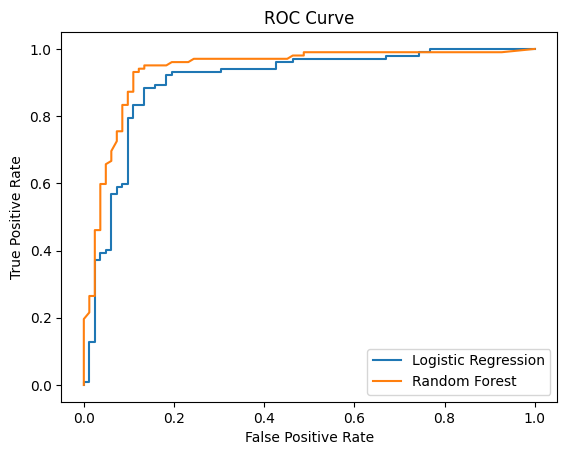

In [ ]:
# Get predicted probabilities for both models
y_prob_lr = best_lr.predict_proba(X_test)[:, 1]
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Plot ROC curves
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()